In [168]:
import warnings 
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
netflix = pd.read_csv("netflix_titles.csv")

In [170]:
netflix.shape

(7787, 12)

In [171]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [172]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [173]:
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [174]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [175]:
netflix['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [176]:
netflix['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [177]:
netflix_shows = netflix[netflix['type'] == 'TV Show']

In [178]:
netflix_shows.shape

(2410, 12)

In [179]:
netflix_movies = netflix[netflix['type'] == 'Movie']

In [180]:
netflix_movies.shape

(5377, 12)

<AxesSubplot:xlabel='type', ylabel='count'>

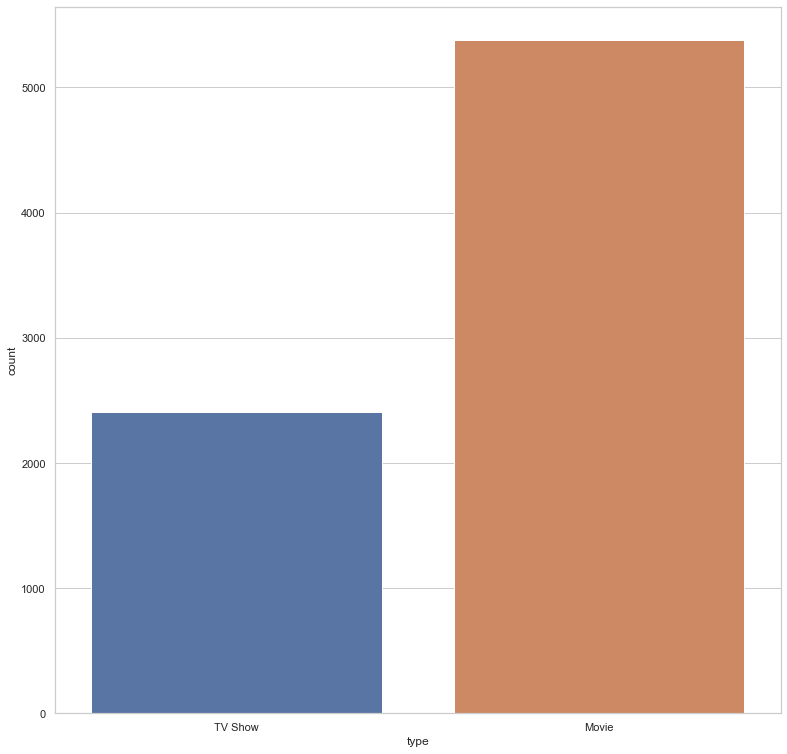

In [181]:
# Analyse Movie Vs TV Shows
sns.countplot(x='type',data=netflix)

# Which is the ideal month (as a  producer of the movie) to relese a movie?

In [182]:
#Analyse the Month of movie relesed
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [183]:
netflix['date_added'].isna().sum()

10

In [184]:
#There is less no of records have missing values so we drop the rows from dataset 

In [185]:
netflix = netflix[netflix['date_added'].notna()] 

In [186]:
netflix['date_added'].isna().sum()

0

In [187]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [188]:
#lets extract Month & year from date_added column

netflix['year'] = netflix['date_added'].apply(lambda x: x.split(',')[-1])
netflix.head(2) # year column has to be created

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016


In [189]:
def assign_month(x):
    return(x.lstrip().split(' ')[0])    

In [190]:
netflix['month'] = netflix['date_added'].apply(assign_month)
netflix.head(3) # month column has to be created

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December


In [191]:
netflix['month'].value_counts()


December     833
October      785
January      757
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: month, dtype: int64

In [192]:
netflix.groupby('year')['month'].value_counts().unstack().fillna(0)

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,1.0
2012,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0
2014,2.0,1.0,6.0,2.0,2.0,1.0,1.0,0.0,0.0,5.0,4.0,1.0
2015,5.0,2.0,23.0,4.0,1.0,8.0,7.0,5.0,7.0,4.0,15.0,7.0
2016,22.0,41.0,96.0,16.0,44.0,29.0,19.0,17.0,13.0,46.0,52.0,48.0


In [193]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'
]

In [194]:
month_order = month_order[::-1]

In [195]:
netflix.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order]

month,December,November,October,September,August,July,June,May,April,March,February,January
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013,2.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2014,6.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0,2.0
2015,23.0,4.0,15.0,7.0,2.0,8.0,7.0,7.0,5.0,5.0,4.0,1.0
2016,96.0,46.0,52.0,48.0,41.0,29.0,19.0,13.0,22.0,17.0,16.0,44.0


In [196]:
df = netflix.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,23.0,96.0,118.0,190.0,222.0,175.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,5.0,4.0,46.0,88.0,160.0,272.0,158.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,15.0,52.0,131.0,192.0,204.0,173.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,119.0,127.0,136.0,178.0,0.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,41.0,115.0,169.0,145.0,144.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,29.0,80.0,157.0,169.0,156.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,95.0,78.0,175.0,167.0,0.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,13.0,88.0,101.0,159.0,173.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,95.0,118.0,171.0,188.0,0.0


In [197]:
len(df.columns)

14

<AxesSubplot:xlabel='year', ylabel='month'>

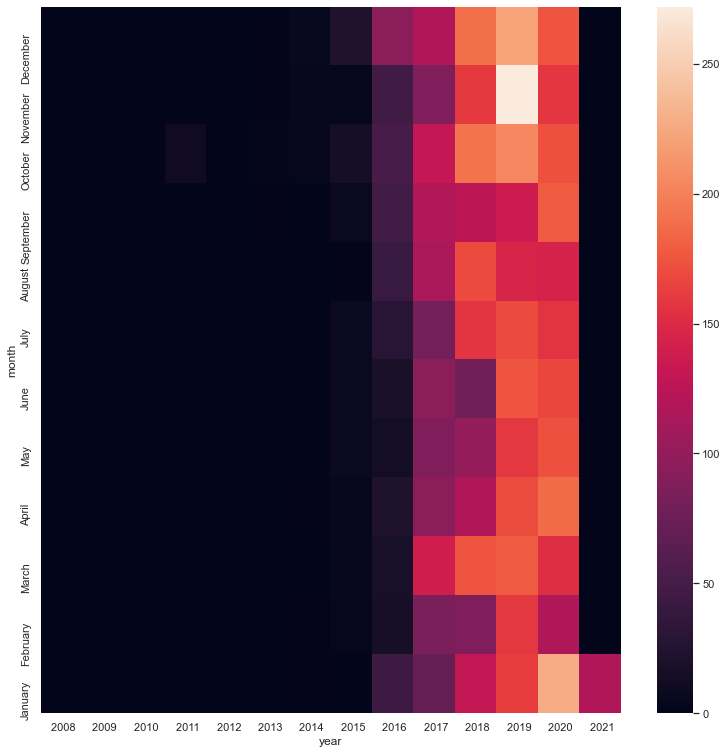

In [198]:
sns.heatmap(df)

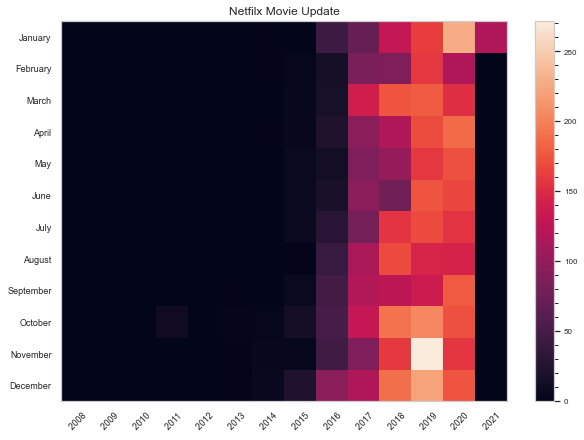

In [199]:
plt.figure(figsize=(10,7))
plt.pcolor(df, linewidths = 2)
plt.xticks(np.arange(0.5,len(df.columns),1),df.columns,fontsize=9,rotation=45)
plt.yticks(np.arange(0.5,len(df.index),1),df.index,fontsize=9,rotation=0)
plt.title('Netfilx Movie Update')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 8)
cbar.ax.minorticks_on()
plt.show();

# Rating Analysis

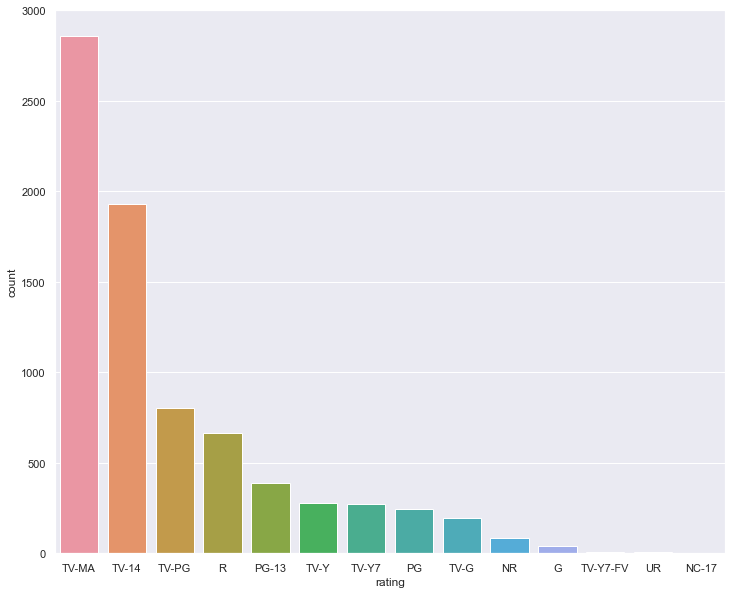

In [200]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(x='rating', data=netflix, order=netflix['rating'].value_counts().index);

# Analyze IMDB rating to get top rated movies on Netflix

In [201]:
imdb_rating = pd.read_csv('IMDB ratings.csv', usecols=['weighted_average_vote'])

In [202]:
imdb_rating.head()

,weighted_average_vote
0,5.9
1,6.1
2,5.8
3,5.2
4,7.0


In [203]:
imdb_titles = pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])

In [204]:
imdb_titles.head()

,title,year,genre
0,Miss Jerry,1894,Romance
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama"
2,Den sorte drøm,1911,Drama
3,Cleopatra,1912,"Drama, History"
4,L'Inferno,1911,"Adventure, Drama, Fantasy"


In [205]:
ratings = pd.DataFrame({
    'title' : imdb_titles['title'],
    'Release Year' : imdb_titles['year'],
    'Rating' : imdb_rating.weighted_average_vote,
    'Genre' : imdb_titles.genre
})

In [206]:
ratings.isna().sum()

title           0
Release Year    0
Rating          0
Genre           0
dtype: int64

In [207]:
ratings[ratings.duplicated()]

,title,Release Year,Rating,Genre


In [208]:
ratings.shape

(85855, 4)

In [209]:
ratings.head()

,title,Release Year,Rating,Genre
0,Miss Jerry,1894,5.9,Romance
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
2,Den sorte drøm,1911,5.8,Drama
3,Cleopatra,1912,5.2,"Drama, History"
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"


In [210]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


In [211]:
joint_data = ratings.merge(netflix, left_on='title', right_on='title', how='inner')

In [212]:
joint_data.head(10)

,title,Release Year,Rating,Genre,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,Sherlock Holmes,1916,6.4,Mystery,s5564,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021,January
1,Sherlock Holmes,1922,5.8,"Drama, Mystery",s5564,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021,January
2,Sherlock Holmes,1932,5.7,Drama,s5564,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021,January
3,Sherlock Holmes,1937,7.1,"Comedy, Crime, Romance",s5564,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021,January
4,Sherlock Holmes,2009,7.6,"Action, Adventure, Mystery",s5564,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021,January
5,Leap Year,1924,6.1,Comedy,s3558,Movie,Anand Tucker,"Amy Adams, Matthew Goode, Adam Scott, John Lit...","United States, Ireland","November 15, 2019",2010,PG,100 min,"Comedies, Romantic Movies",Anna chooses February 29 to propose marriage t...,2019,November
6,The Trap,1922,6.0,Drama,s6938,Movie,Erik White,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",United States,"April 1, 2019",2017,TV-MA,91 min,Comedies,A man returns home to Atlanta to try and turn ...,2019,April
7,The Trap,1946,6.4,"Comedy, Crime, Mystery",s6938,Movie,Erik White,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",United States,"April 1, 2019",2017,TV-MA,91 min,Comedies,A man returns home to Atlanta to try and turn ...,2019,April
8,The Trap,2019,4.3,Comedy,s6938,Movie,Erik White,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",United States,"April 1, 2019",2017,TV-MA,91 min,Comedies,A man returns home to Atlanta to try and turn ...,2019,April
9,Michael,1924,7.1,"Drama, Romance",s4067,Movie,Ribhu Dasgupta,"Naseeruddin Shah, Mahie Gill, Sabyasachi Chakr...",India,"July 5, 2020",2011,TV-MA,86 min,"Dramas, Independent Movies, International Movies",After a dedicated cop accidentally kills a 12-...,2020,July


In [213]:
joint_data.shape

(2737, 17)

In [214]:
joint_data = joint_data.sort_values(by='Rating', ascending=False)
joint_data.head()

,title,Release Year,Rating,Genre,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
1000,Breakout,2019,9.0,"Adventure, Comedy, Drama",s1093,TV Show,NaN,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",NaN,"July 1, 2017",2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...,2017,July
989,Innocent,2017,9.0,Comedy,s3009,TV Show,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ...",2019,January
398,Pulp Fiction,1994,8.9,"Crime, Drama",s5003,Movie,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,2019,January
380,Schindler's List,1993,8.9,"Biography, Drama, History",s5431,Movie,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,2018,April
1299,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s2980,Movie,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru...",2020,January


# Top 10 rated movies on Netflix

In [215]:
joint_data['title'].head(10)

1000                         Breakout
989                          Innocent
398                      Pulp Fiction
380                  Schindler's List
1299                        Inception
1667           Much Ado About Nothing
1972           Eh Janam Tumhare Lekhe
2667    Ani... Dr. Kashinath Ghanekar
227                          Gol Maal
734                       City of God
Name: title, dtype: object

In [216]:
# Lets look at a more classy way

import plotly.express as px

top_rated = joint_data[:10]

fig = px.sunburst(top_rated,
                 path=['title','country'],
                 values='Rating',
                  color='Rating'
                 )

fig.show();

In [217]:
top_rated = joint_data[:10]

fig = px.sunburst(top_rated,
                 path=['title','type','country'],
                 values='Rating',
                  color='Rating'
                 )

fig.show();

In [218]:
# Countries with highest rated content

country_count = joint_data['country'].value_counts().sort_values(ascending=False)

In [219]:
country_count.head()

United States     797
India             701
United Kingdom    107
Canada             56
Philippines        50
Name: country, dtype: int64

In [220]:
country_count = pd.DataFrame(country_count)
country_count

,country
United States,797
India,701
United Kingdom,107
Canada,56
Philippines,50
...,...
"Canada, United Kingdom",1
"Poland, United States",1
"Nigeria, United Kingdom",1
"United States, Japan",1


In [221]:
country_count.head(10)

,country
United States,797
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


In [222]:
topcountries = country_count[:10]
topcountries

,country
United States,797
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


In [223]:
list(topcountries.index)

['United States',
 'India',
 'United Kingdom',
 'Canada',
 'Philippines',
 'Spain',
 'South Korea',
 'Indonesia',
 'France',
 'United Kingdom, United States']

In [224]:
list(topcountries['country'].values)

[797, 701, 107, 56, 50, 40, 36, 35, 33, 31]

In [225]:
data = dict(
    number=list(topcountries['country'].values),
    country=list(topcountries.index)
)

fig = px.funnel(data, x='number', y='country')
fig.show()

# Year wise analysis

In [226]:
netflix['release_year'].value_counts()

2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1966       1
1947       1
1959       1
1964       1
1925       1
Name: release_year, Length: 73, dtype: int64

In [227]:
netflix['release_year'].value_counts().index[:15]

Int64Index([2018, 2017, 2019, 2016, 2020, 2015, 2014, 2013, 2012, 2010, 2011,
            2009, 2008, 2006, 2007],
           dtype='int64')

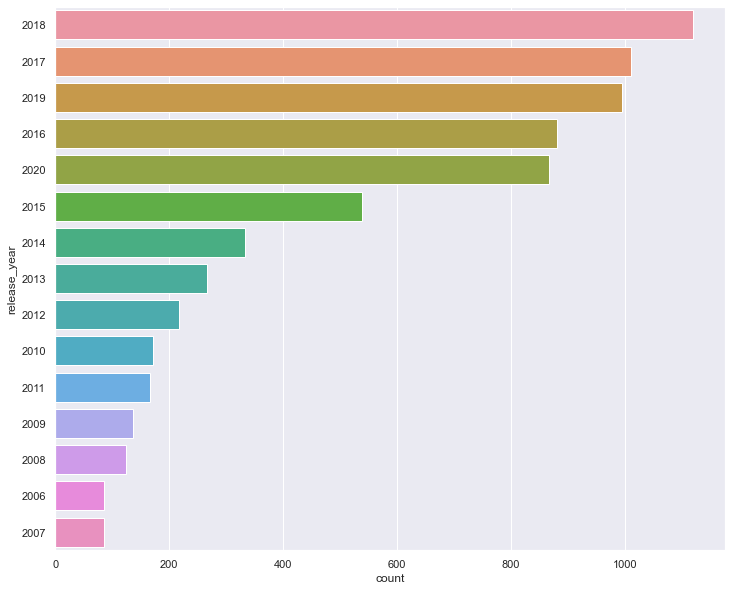

In [228]:
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')

sns.countplot(y='release_year', data=netflix, order=netflix['release_year'].value_counts().index[:15]);

In [229]:
country = list(netflix['country'])

In [230]:
country

['Brazil',
 'Mexico',
 'Singapore',
 'United States',
 'United States',
 'Turkey',
 'Egypt',
 'United States',
 'India',
 'India',
 'United States',
 'Poland, United States',
 'Mexico',
 'Thailand',
 'United States',
 'Nigeria',
 nan,
 'Norway, Iceland, United States',
 'India',
 'United Kingdom',
 'India',
 'India',
 'India',
 'India',
 'Japan',
 'United States',
 'United States',
 'South Korea',
 'Italy',
 'United States',
 'Canada',
 'Indonesia',
 'Indonesia',
 'United States',
 'Canada',
 'United States',
 'Romania',
 'Romania',
 nan,
 'Spain',
 'Turkey',
 'Iceland',
 'Turkey',
 'Nigeria',
 'United States',
 'Turkey',
 'United States',
 'United States',
 'South Africa, Nigeria',
 'France',
 'United States, South Africa',
 'South Korea',
 'Spain',
 'United States',
 'Portugal, Spain',
 'United States',
 'United States',
 'Indonesia',
 'United Kingdom',
 'India',
 'United States',
 'South Korea',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States'

In [231]:
countries = netflix['country'].value_counts()

In [232]:
# netflix['country'].fillna('Unknown', inplace=True)

countries_fin={}

for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no

countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}


In [233]:
countries_fin

{'UnitedStates': 2549,
 'India': 923,
 'UnitedKingdom': 396,
 'Japan': 225,
 'SouthKorea': 183,
 'Canada': 177,
 'Spain': 134,
 'France': 115,
 'Egypt': 101,
 'Turkey': 100,
 'Mexico': 100,
 'Australia': 82,
 'Taiwan': 78,
 'Brazil': 72,
 'Philippines': 71,
 'Indonesia': 70,
 'Nigeria': 70,
 'UnitedKingdom,UnitedStates': 64,
 'Germany': 61,
 'UnitedStates,Canada': 60,
 'Thailand': 57,
 'China': 57,
 'HongKong': 52,
 'Argentina': 50,
 'Canada,UnitedStates': 42,
 'Italy': 40,
 'UnitedStates,UnitedKingdom': 37,
 'Colombia': 31,
 'France,Belgium': 27,
 'SouthAfrica': 25,
 'Singapore': 23,
 'Malaysia': 22,
 'Poland': 20,
 'Pakistan': 18,
 'Netherlands': 16,
 'HongKong,China': 16,
 'Russia': 16,
 'China,HongKong': 14,
 'Chile': 14,
 'Lebanon': 14,
 'UnitedStates,France': 14,
 'Mexico,UnitedStates': 14,
 'UnitedStates,Japan': 13,
 'Denmark': 13,
 'UnitedStates,Germany': 12,
 'Israel': 12,
 'UnitedArabEmirates': 12,
 'UnitedStates,Mexico': 11,
 'Norway': 11,
 'Ireland': 11,
 'UnitedStates,Aust

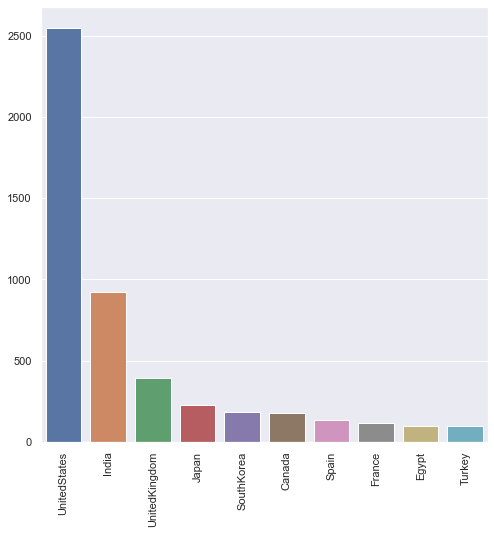

In [234]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[:10],
                y=list(countries_fin.values())[:10])
ax.set_xticklabels(list(countries_fin.keys())[:10], rotation=90);

In [235]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


# Analysis of duration of movie

In [236]:
netflix['duration'] = netflix['duration'].str.replace(' min','')

In [237]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December


In [238]:
netflix[netflix['duration'].str.contains("Season")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,July
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,November
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,May
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,December
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020,August
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,July
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,2019,November


In [239]:
len(netflix[netflix['duration'].str.contains("Season")])

2400

In [240]:
nflix_duration= netflix[netflix['duration'].str.contains("Season")== False]

In [241]:
nflix_duration['duration'] = nflix_duration['duration'].astype(int)

In [242]:
nflix_duration.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int32
listed_in       object
description     object
year            object
month           object
dtype: object

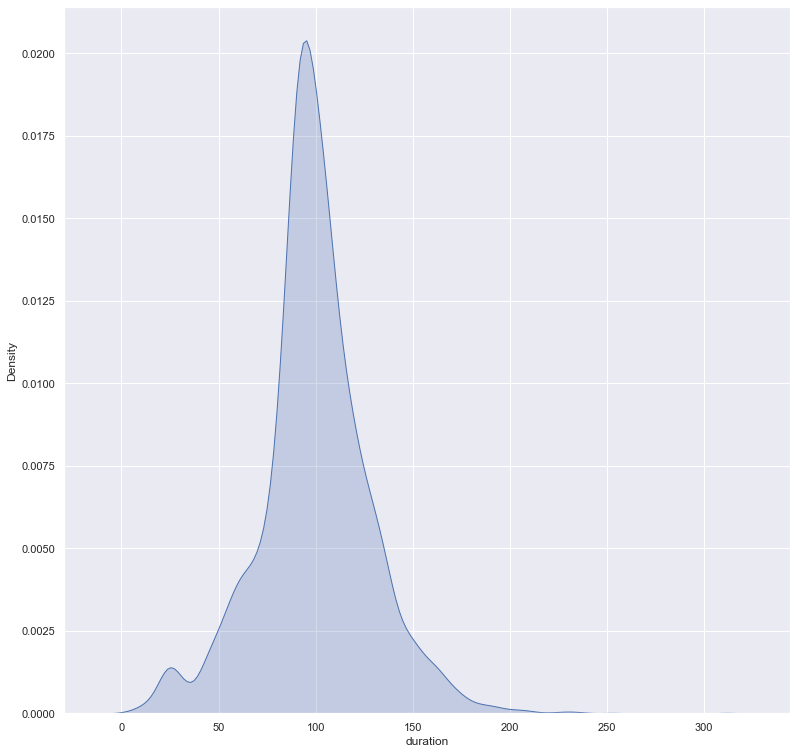

In [243]:
sns.kdeplot(data=nflix_duration['duration'], shade=True);

A good amount of movie on netflix.com are having  an average duration of 75 - 120 mins.

In [244]:
from collections import Counter
genres = netflix['listed_in']
#genres.value_counts()
gen = []
for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',''))

In [245]:
g = Counter(gen)

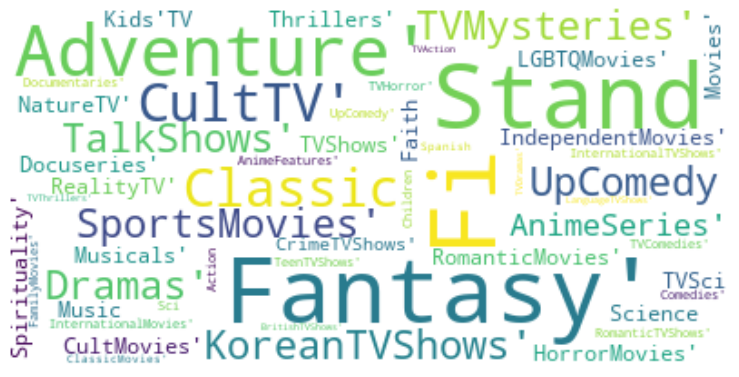

In [246]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13,13)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show();

# Lollipop plot of genres vs their count on Netflix

In [247]:
g = dict(g)

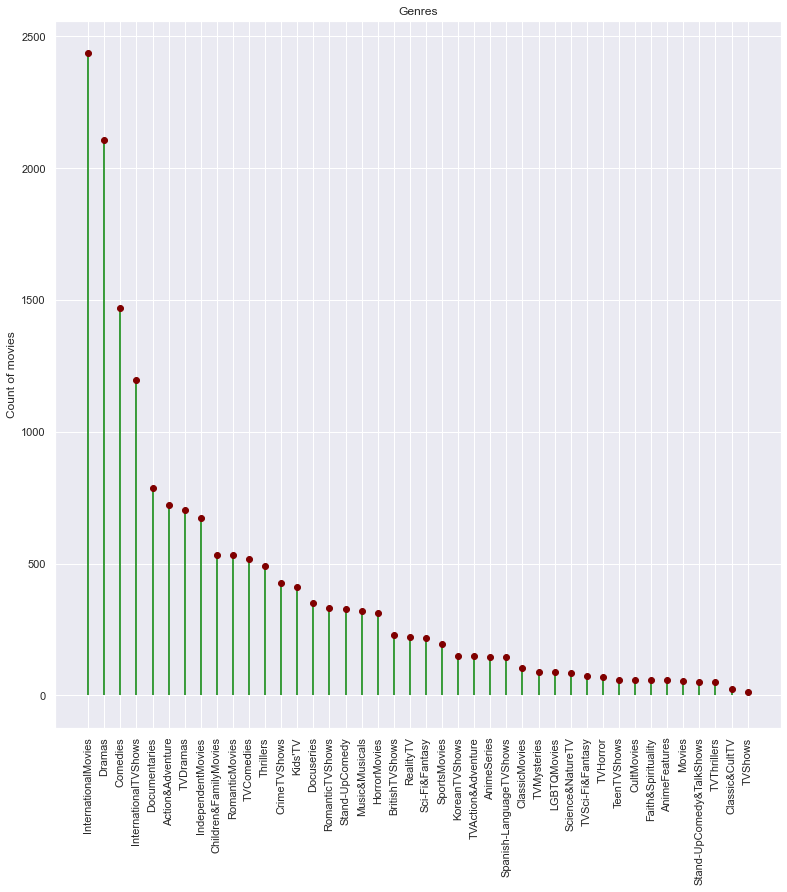

In [248]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

fig, ax = plt.subplots()

x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
ax.set_title('Genres');

# Analysis of TV Series on Netflix

In [249]:
countries1={}
netflix['country']=netflix['country'].fillna('Unknown')
cou1=list(netflix['country'])
for i in cou1:
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1


In [250]:
countries1

{'Brazil': 1,
 'Mexico': 1,
 'Singapore': 1,
 'United States': 1,
 'Turkey': 1,
 'Egypt': 1,
 'India': 1,
 'Poland': 1,
 ' United States': 414,
 'Thailand': 1,
 'Nigeria': 1,
 'Unknown': 1,
 'Norway': 2,
 ' Iceland': 4,
 'United Kingdom': 2,
 'Japan': 1,
 'South Korea': 1,
 'Italy': 2,
 'Canada': 4,
 'Indonesia': 1,
 'Romania': 3,
 'Spain': 1,
 'Iceland': 1,
 'South Africa': 1,
 ' Nigeria': 5,
 'France': 1,
 ' South Africa': 19,
 'Portugal': 2,
 ' Spain': 47,
 'Hong Kong': 1,
 ' China': 61,
 ' Singapore': 11,
 ' Germany': 107,
 'Argentina': 3,
 ' France': 153,
 ' Serbia': 4,
 'Germany': 3,
 'Denmark': 1,
 ' Poland': 10,
 'Kenya': 2,
 'New Zealand': 2,
 ' United Kingdom': 146,
 'Pakistan': 1,
 'Australia': 1,
 'China': 1,
 ' Hong Kong': 25,
 'Taiwan': 1,
 ' South Korea': 18,
 ' Japan': 50,
 ' Canada': 153,
 'Netherlands': 1,
 ' Denmark': 14,
 ' Netherlands': 20,
 'Philippines': 1,
 'United Arab Emirates': 2,
 'Iran': 1,
 ' Belgium': 71,
 ' Brazil': 9,
 'Israel': 1,
 ' Mexico': 31,
 'Uru

# Most Content Creating Conuntries

In [251]:
countries_fin1 = {}
for country, no in countries1.items():
    country = country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1 = {k: v for k, v in sorted(countries_fin1.items(), key = lambda item: item[1], reverse = True)}       

<AxesSubplot:title={'center':'Content Creating Conuntries'}>

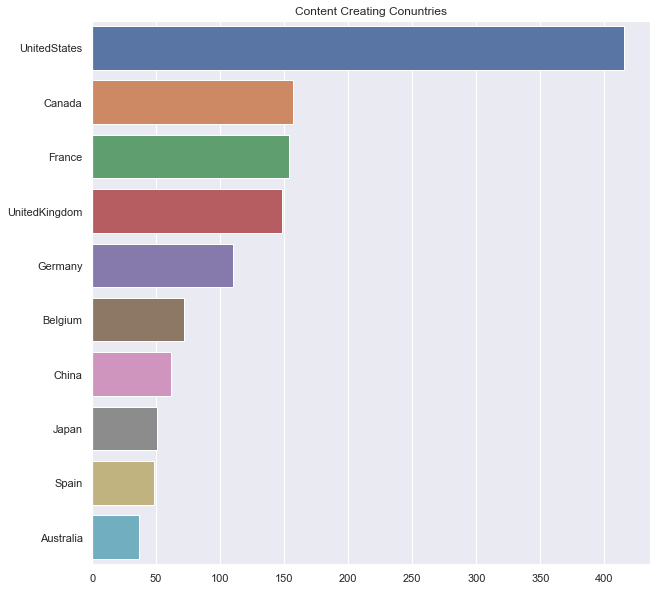

In [252]:
plt.figure(figsize=(10,10))
plt.title("Content Creating Conuntries")
# Bar chart show avg arraival delay by countries

sns.barplot(y=list(countries_fin1.keys())[:10], x=list(countries_fin1.values())[:10])

US has most content that is creating country for Netflix in TV category.

# TV Shows with largest no of seasons

In [253]:
features = ['title','duration']
durations = netflix[features]

In [254]:
durations.head()

,title,duration
0,3%,4 Seasons
1,7:19,93
2,23:59,78
3,9,80
4,21,123


In [255]:
x = durations[durations['duration'].str.contains('Season')]
x['duration'].value_counts()

1 Season      1608
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
11 Seasons       2
12 Seasons       2
15 Seasons       2
13 Seasons       1
16 Seasons       1
Name: duration, dtype: int64

In [256]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 7785
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2400 non-null   object
 1   duration  2400 non-null   object
dtypes: object(2)
memory usage: 56.2+ KB


In [260]:
x['duration'] = x['duration'].str.replace(' Seasons', '')
x['duration'] = x['duration'].str.replace(' Season', '')

In [261]:
x.head

<bound method NDFrame.head of                       title duration
0                        3%        4
5                        46        1
11                     1983        1
12                     1994        1
16                   Feb-09        1
...                     ...      ...
7767     Zindagi Gulzar Hai        1
7775             Zoids Wild        1
7777            Zombie Dumb        2
7779              Zona Rosa        1
7785  Zumbo's Just Desserts        1

[2400 rows x 2 columns]>

In [264]:
x['duration'] =  x['duration'].astype(int)

In [266]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 7785
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2400 non-null   object
 1   duration  2400 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 46.9+ KB


In [272]:
season_count = x.sort_values(by='duration',ascending=False)
top20 = season_count[:20]
top20

,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
2678,Heartland,11
1300,Cheers,11
1597,Danger Mouse: Classic Collection,10
5538,Shameless (U.S.),10


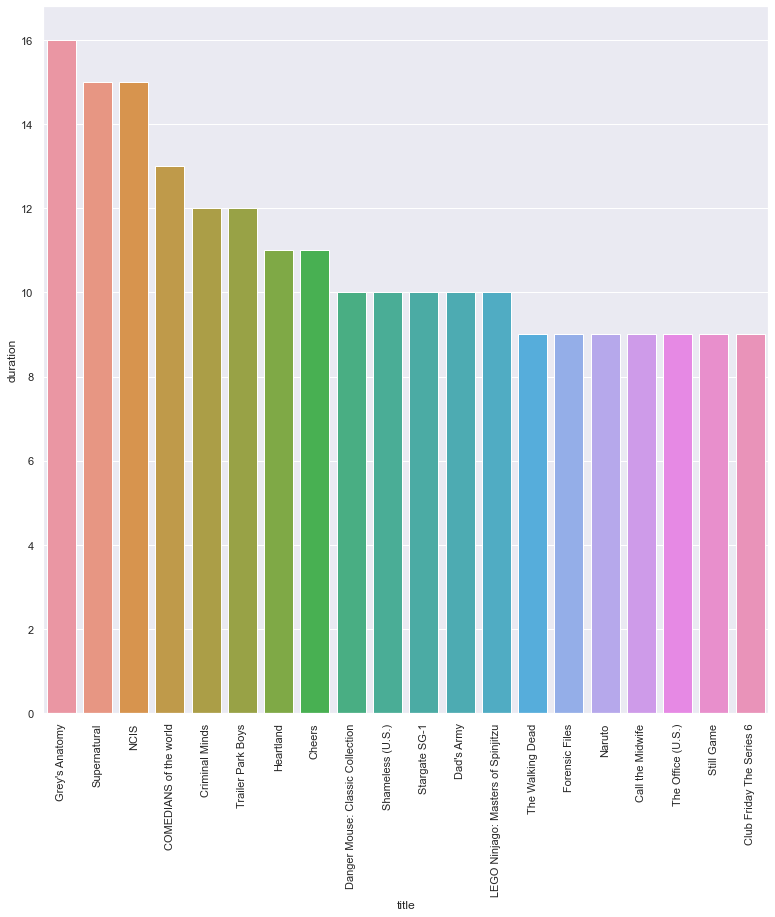

In [279]:
plt.figure()
sns.barplot(x='title', y='duration', data=top20)
plt.xticks(rotation=90)
plt.show();

Grey's Anatomy has maximum (16) number of seasons.

In [280]:
countries_fin

{'UnitedStates': 2549,
 'India': 923,
 'UnitedKingdom': 396,
 'Japan': 225,
 'SouthKorea': 183,
 'Canada': 177,
 'Spain': 134,
 'France': 115,
 'Egypt': 101,
 'Turkey': 100,
 'Mexico': 100,
 'Australia': 82,
 'Taiwan': 78,
 'Brazil': 72,
 'Philippines': 71,
 'Indonesia': 70,
 'Nigeria': 70,
 'UnitedKingdom,UnitedStates': 64,
 'Germany': 61,
 'UnitedStates,Canada': 60,
 'Thailand': 57,
 'China': 57,
 'HongKong': 52,
 'Argentina': 50,
 'Canada,UnitedStates': 42,
 'Italy': 40,
 'UnitedStates,UnitedKingdom': 37,
 'Colombia': 31,
 'France,Belgium': 27,
 'SouthAfrica': 25,
 'Singapore': 23,
 'Malaysia': 22,
 'Poland': 20,
 'Pakistan': 18,
 'Netherlands': 16,
 'HongKong,China': 16,
 'Russia': 16,
 'China,HongKong': 14,
 'Chile': 14,
 'Lebanon': 14,
 'UnitedStates,France': 14,
 'Mexico,UnitedStates': 14,
 'UnitedStates,Japan': 13,
 'Denmark': 13,
 'UnitedStates,Germany': 12,
 'Israel': 12,
 'UnitedArabEmirates': 12,
 'UnitedStates,Mexico': 11,
 'Norway': 11,
 'Ireland': 11,
 'UnitedStates,Aust

# Content in India

In [283]:
india = netflix[netflix['country']=='India']

In [284]:
india

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019,April
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017,December
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019,March
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,TV-14,110,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,2018,September
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,TV-14,128,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",2018,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,TV-14,159,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,2019,May
7769,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019,December
7776,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,PG,104,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018,November
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,July


In [287]:
india.dropna(inplace=True)

In [292]:
import plotly.express as px

fig = px.treemap(india[:20], path=['listed_in','director'],
                 color='director',
                 hover_data=['director','title']
                ) 
fig.show();

# Thank you!